# Plot a 2D map to indicate multiplexity potential of the dual encoding strategy

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
# plt a 2D array
# which each row is N range from Intensity states (I-1) range from 1 to 5
# and each column is channel number (N) range from 3 to 12

int_states = np.arange(1, 6, 0.1)
chn_num = np.arange(3, 13, 0.1)

sim = np.zeros((len(chn_num), len(int_states)), dtype=int)
for i, int_state in enumerate(int_states):
    for j, chn in enumerate(chn_num):
        sim[j][i] = (int_state**3)*scipy.special.comb(chn, 3)

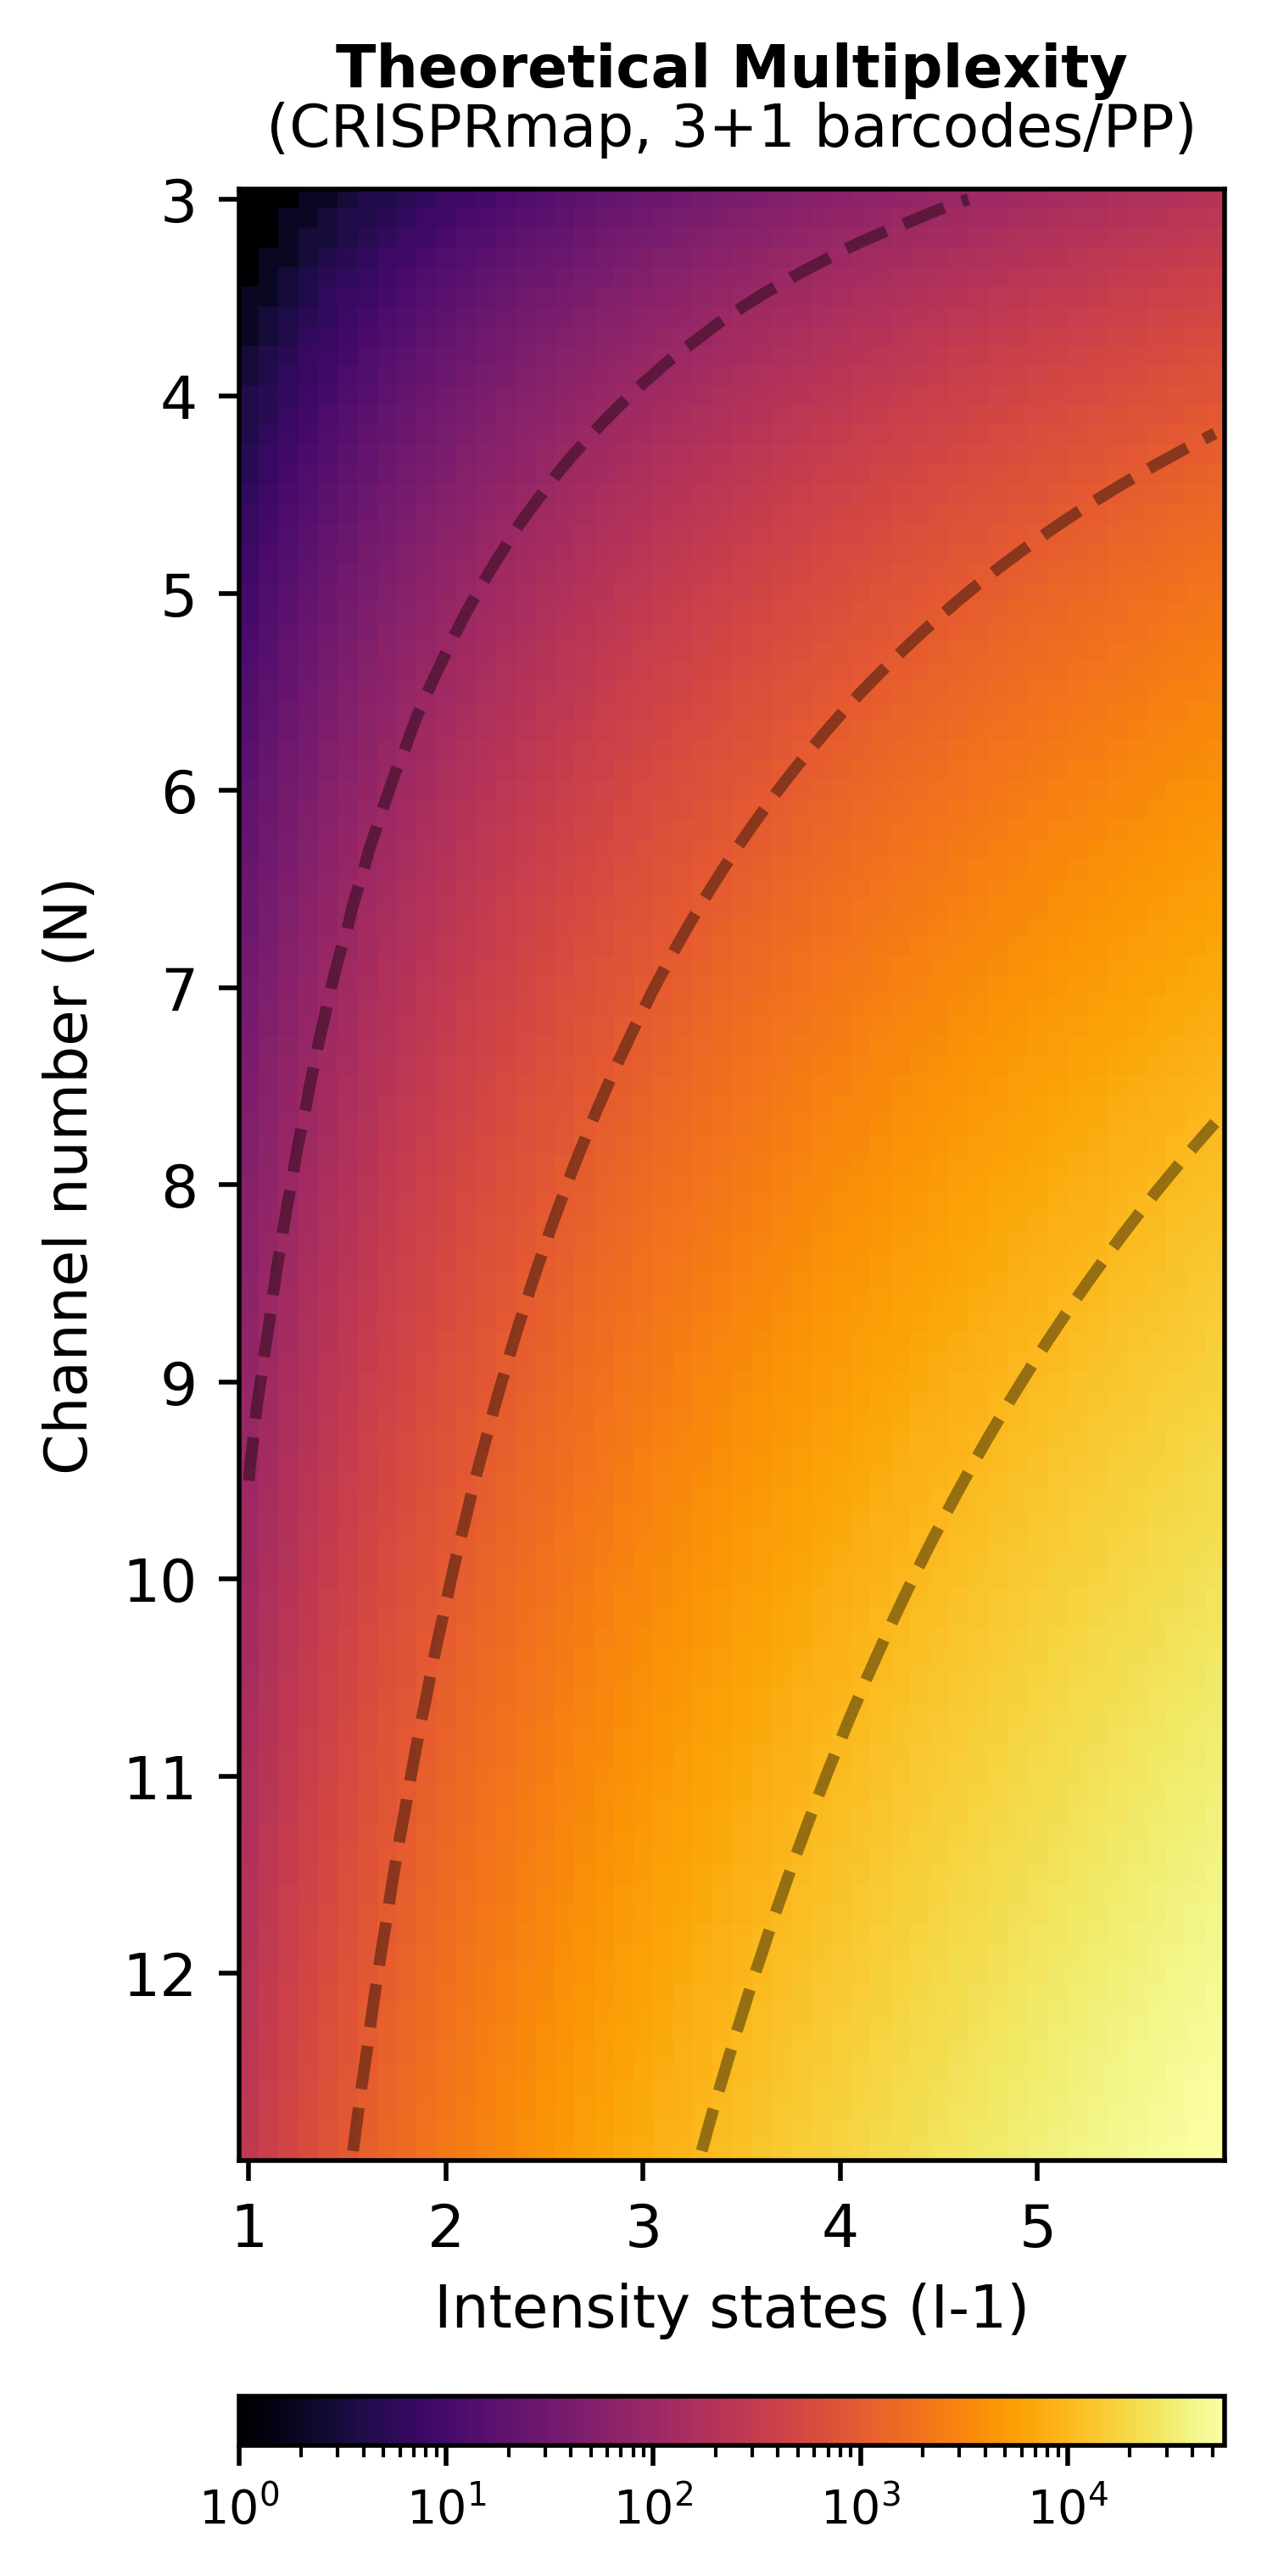

In [3]:
from matplotlib.colors import LogNorm

# plot a heatmap with log-scaled colorbar
plt.figure(figsize=(3, 9), dpi=500)
plt.imshow(sim, cmap='inferno', norm=LogNorm(), interpolation='nearest')
# place the colorbar on the bottom, horizontally
cbar = plt.colorbar(orientation='horizontal', pad=0.08)
# cbar.ax.xaxis.set_label_position('top')
cbar.ax.xaxis.set_ticks_position('bottom')
cbar.ax.xaxis.set_tick_params(labelsize=8)
cbar.ax.tick_params(labelsize=8)
# set x and y ticks, show only every 10th tick
plt.yticks(np.arange(0, len(chn_num), 10), chn_num[::10].astype(int))
plt.xticks(np.arange(0, len(int_states), 10), int_states[::10].astype(int))

plt.xlabel('Intensity states (I-1)')
plt.ylabel('Channel number (N)')
# set title, include a padding, make part of the title bold
# first line(bold)
plt.text(0.5, 1.06, 'Theoretical Multiplexity', fontsize=10, fontweight='bold', ha='center', va='center', transform=plt.gca().transAxes)
# second line
plt.text(0.5, 1.03, '(CRISPRmap, 3+1 barcodes/PP)', fontsize=10, ha='center', va='center', transform=plt.gca().transAxes)

# add contours for values 1000 and 10000
contour_levels = [100, 1000, 10000]
plt.contour(sim, levels=contour_levels, colors='black', linewidths=2, alpha = 0.4, linestyles='dashed')

plt.show()